In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv("dynamic_pricing.csv")

# Display basic info
print("----- Dataset Info -----")
print(data.info())

# Check for null values
print("\n----- Null Values -----")
print(data.isnull().sum())

# Check for duplicate rows
print("\n----- Duplicate Rows -----")
print(data.duplicated().sum())

# Basic statistics for numerical columns
print("\n----- Summary Statistics -----")
print(data.describe())







----- Dataset Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB
None

----- Null Values -----
Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Pa

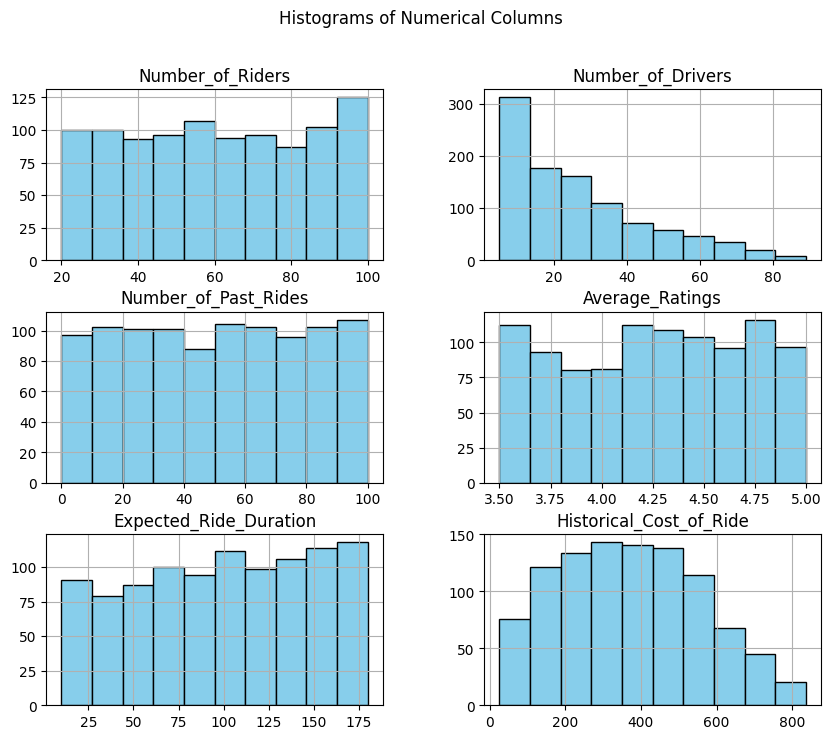

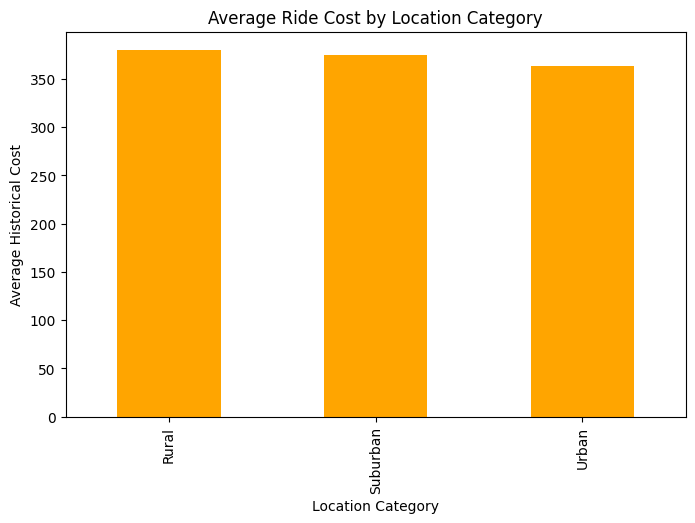

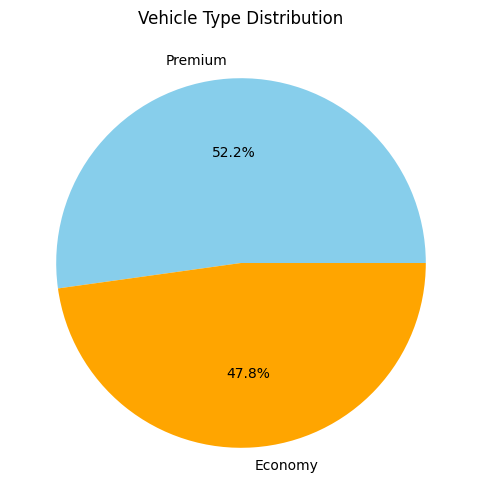

In [2]:
import matplotlib.pyplot as plt

# Histogram for all numerical columns
data.hist(figsize=(10,8), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Columns")
plt.show()

# Bar chart: Average ride cost by location category
plt.figure(figsize=(8,5))
data.groupby('Location_Category')['Historical_Cost_of_Ride'].mean().plot(kind='bar', color='orange')
plt.title("Average Ride Cost by Location Category")
plt.xlabel("Location Category")
plt.ylabel("Average Historical Cost")
plt.show()

# Pie chart: Vehicle Type distribution
plt.figure(figsize=(6,6))
data['Vehicle_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue','orange','green'])
plt.title("Vehicle Type Distribution")
plt.ylabel('')
plt.show()


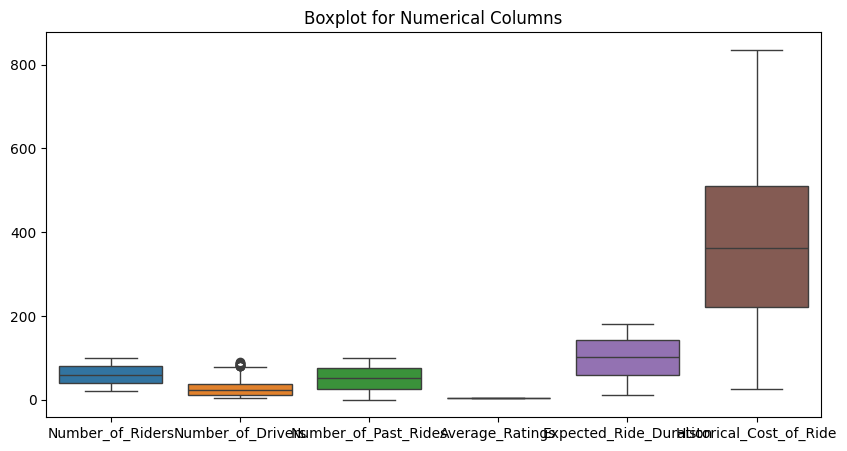

----- Number of Outliers Detected (Z-score > 3) -----
[0 4 0 0 0 0]


In [4]:
import seaborn as sns
import numpy as np
from scipy import stats

# Boxplot for numerical columns
plt.figure(figsize=(10,5))
sns.boxplot(data=data.select_dtypes(include=np.number))
plt.title("Boxplot for Numerical Columns")
plt.show()

# Outlier detection using Z-score method
numeric_cols = data.select_dtypes(include=np.number).columns
z_scores = np.abs(stats.zscore(data[numeric_cols]))
outliers = (z_scores > 3).sum(axis=0)

print("----- Number of Outliers Detected (Z-score > 3) -----")
print(outliers)



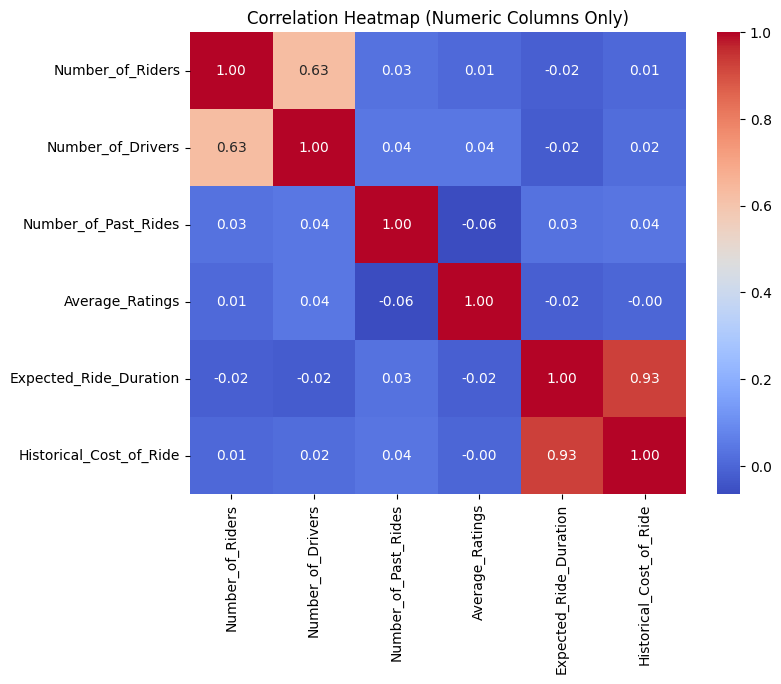

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


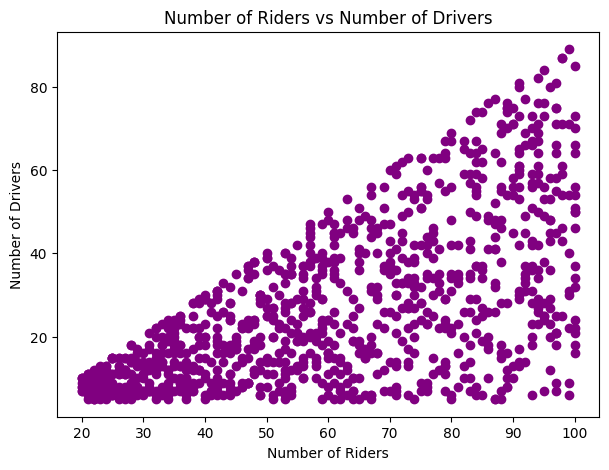

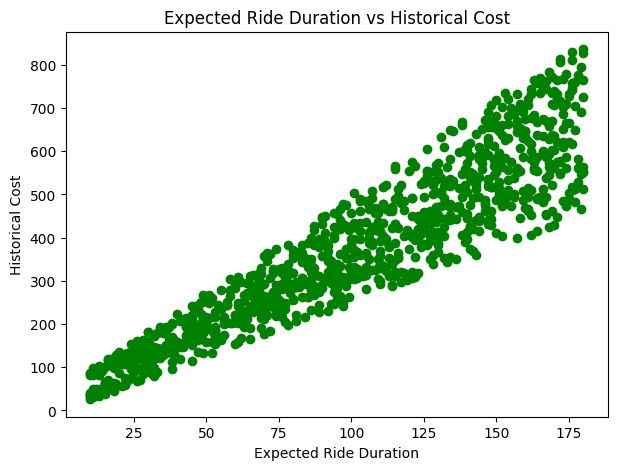

In [8]:
# Scatter plot: Number of Riders vs Number of Drivers
plt.figure(figsize=(7,5))
plt.scatter(data['Number_of_Riders'], data['Number_of_Drivers'], color='purple')
plt.title("Number of Riders vs Number of Drivers")
plt.xlabel("Number of Riders")
plt.ylabel("Number of Drivers")
plt.show()

# Scatter plot: Expected Ride Duration vs Historical Cost
plt.figure(figsize=(7,5))
plt.scatter(data['Expected_Ride_Duration'], data['Historical_Cost_of_Ride'], color='green')
plt.title("Expected Ride Duration vs Historical Cost")
plt.xlabel("Expected Ride Duration")
plt.ylabel("Historical Cost")
plt.show()


In [9]:
print("----- Dataset Overview -----")
print(f"Shape: {data.shape}")
print(f"Columns: {list(data.columns)}")

print("\n----- Column Data Types -----")
print(data.dtypes)

print("\n----- Number of Missing Values per Column -----")
print(data.isnull().sum())

print("\n----- Number of Numerical Columns -----")
print(len(data.select_dtypes(include=['number']).columns))

print("\n----- Number of Categorical Columns -----")
print(len(data.select_dtypes(include=['object']).columns))


----- Dataset Overview -----
Shape: (1000, 10)
Columns: ['Number_of_Riders', 'Number_of_Drivers', 'Location_Category', 'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings', 'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']

----- Column Data Types -----
Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

----- Number of Missing Values per Column -----
Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv("dynamic_pricing.csv")

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", list(categorical_cols))

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col].astype(str))

print("\n✅ Categorical variables encoded successfully!")
print(data.head())


Categorical Columns: ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']

✅ Categorical variables encoded successfully!
   Number_of_Riders  Number_of_Drivers  Location_Category  \
0                90                 45                  2   
1                58                 39                  1   
2                42                 31                  0   
3                89                 28                  0   
4                78                 22                  0   

   Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                        2                    13             4.47   
1                        2                    72             4.06   
2                        2                     0             3.99   
3                        1                    67             4.31   
4                        1                    74             3.77   

   Time_of_Booking  Vehicle_Type  Expected_Ride_Duration  \
0     

In [12]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [14]:
# Summary statistics
print("----- Summary Statistics -----")
print(data.describe())

# Info about data types and missing values
print("\n----- Dataset Info -----")
print(data.info())


----- Summary Statistics -----
       Number_of_Riders  Number_of_Drivers  Location_Category  \
count       1000.000000        1000.000000          1000.0000   
mean          60.372000          27.076000             1.0140   
std           23.701506          19.068346             0.8237   
min           20.000000           5.000000             0.0000   
25%           40.000000          11.000000             0.0000   
50%           60.000000          22.000000             1.0000   
75%           81.000000          38.000000             2.0000   
max          100.000000          89.000000             2.0000   

       Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
count              1000.000000           1000.000000      1000.000000   
mean                  1.054000             50.031000         4.257220   
std                   0.823263             29.313774         0.435781   
min                   0.000000              0.000000         3.500000   
25%               

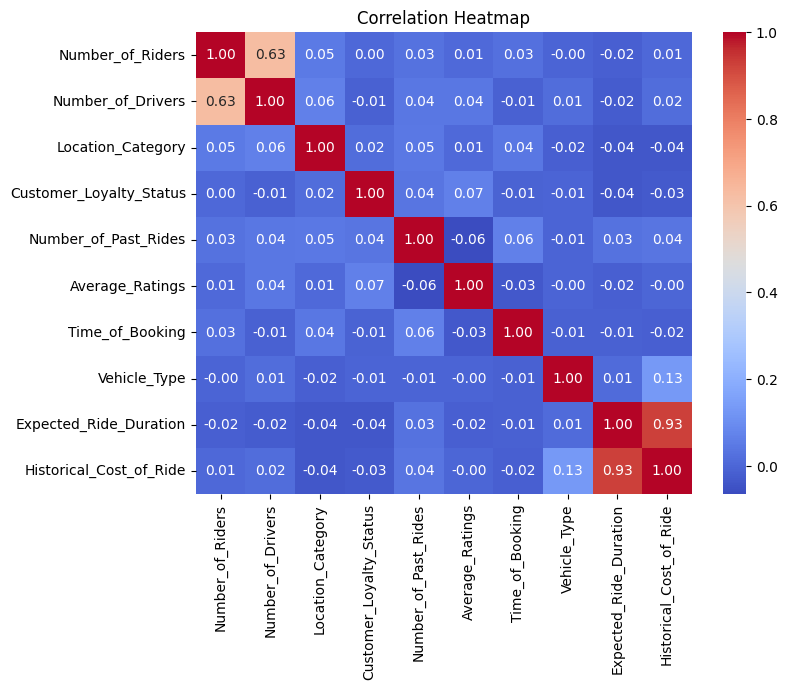

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


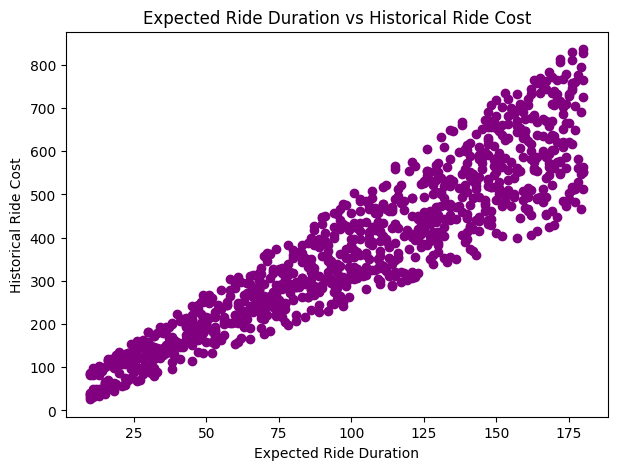

In [16]:
plt.figure(figsize=(7,5))
plt.scatter(data['Expected_Ride_Duration'], data['Historical_Cost_of_Ride'], color='purple')
plt.title("Expected Ride Duration vs Historical Ride Cost")
plt.xlabel("Expected Ride Duration")
plt.ylabel("Historical Ride Cost")
plt.show()


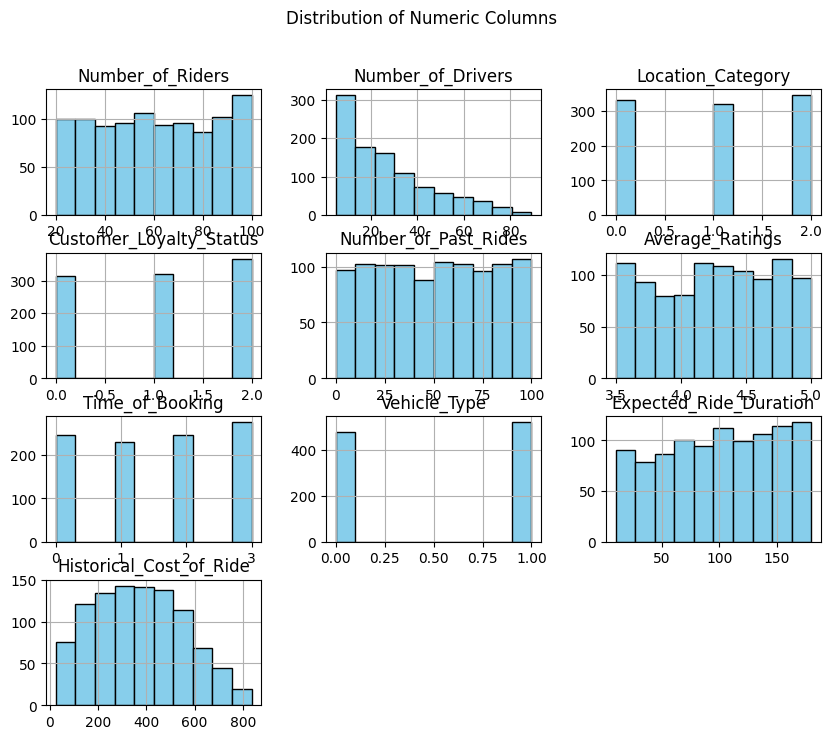

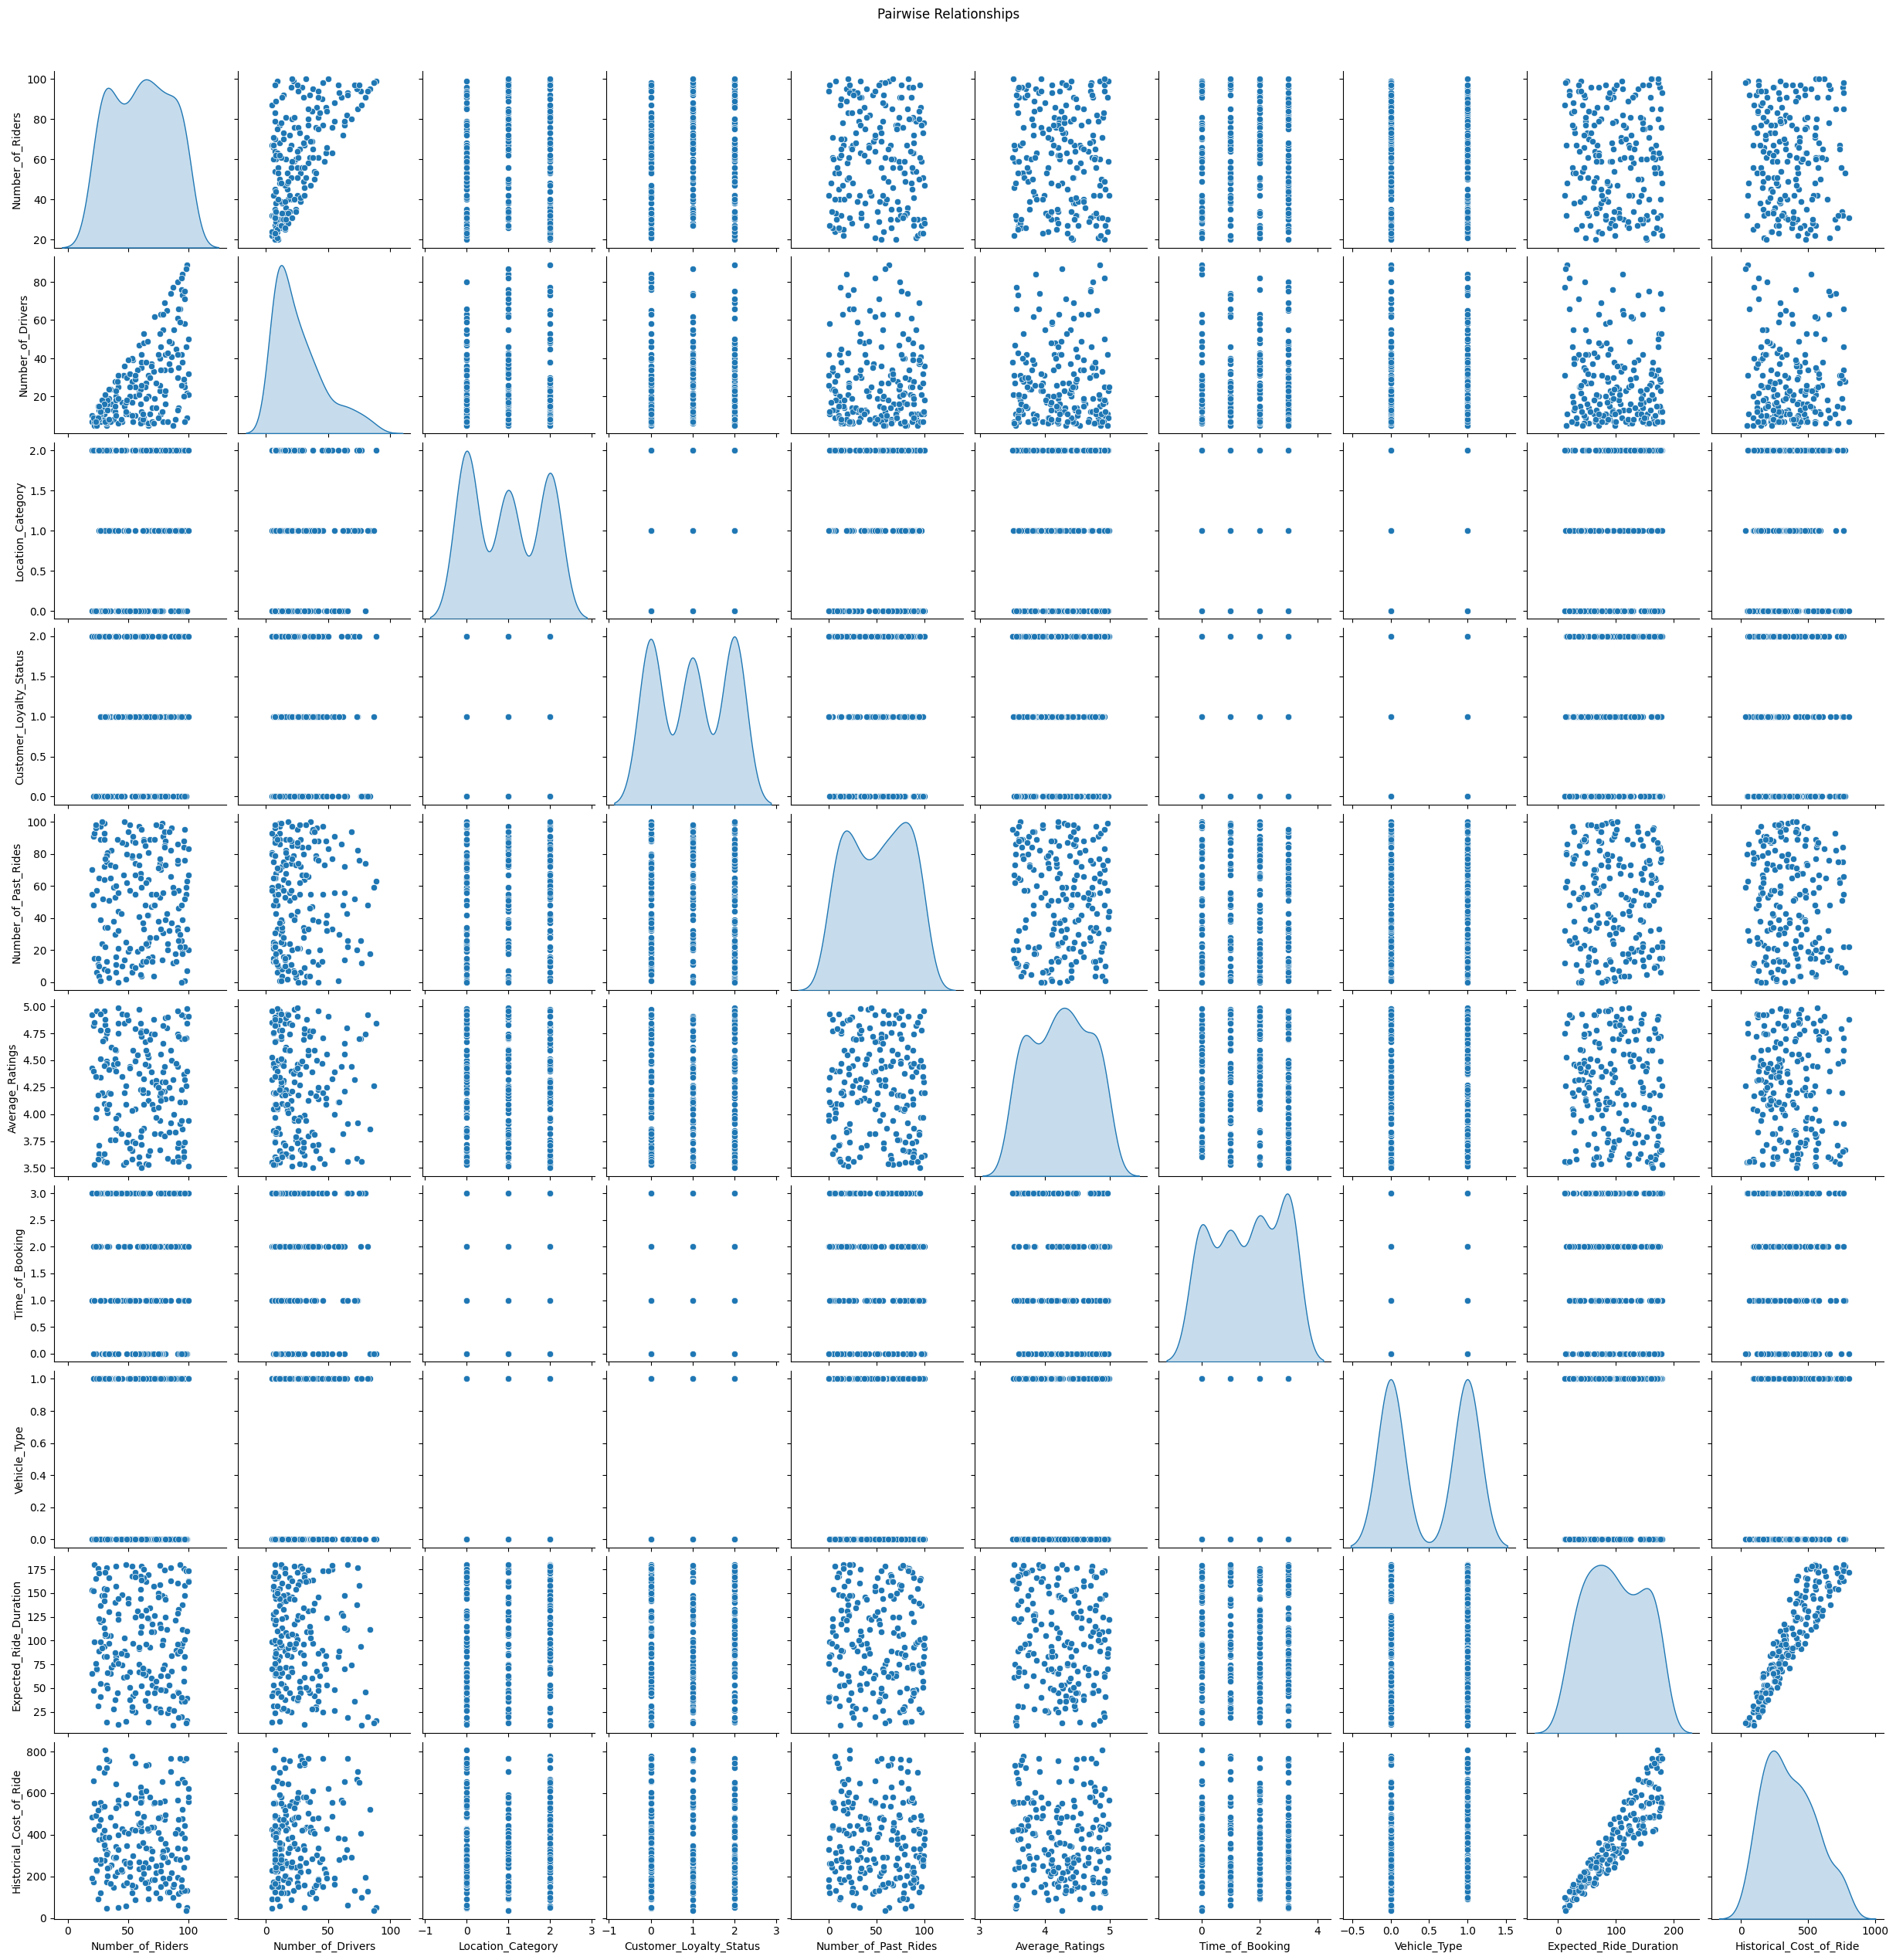

In [17]:
# Histogram
data.hist(figsize=(10,8), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Columns")
plt.show()

# Pairplot (relationship between all variables)
sns.pairplot(data.sample(min(200, len(data))), diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


In [20]:
# 🧹 Fill Missing Values Properly (No FutureWarning)

# Fill numeric columns (int/float) with median
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col] = data[col].fillna(data[col].median())  # No inplace=True needed

# Fill categorical columns (object/string) with mode
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

print("✅ Missing values handled successfully without warnings!")


✅ Missing values handled successfully without warnings!


In [21]:
# Remove duplicates
data.drop_duplicates(inplace=True)

# Reset index
data.reset_index(drop=True, inplace=True)

# Save cleaned dataset
data.to_csv("dynamic_pricing_cleaned.csv", index=False)

print("✅ Cleaned CSV saved successfully as 'dynamic_pricing_cleaned.csv'")



✅ Cleaned CSV saved successfully as 'dynamic_pricing_cleaned.csv'


In [22]:
print("""
KPIs (Key Performance Indicators) are measurable values that indicate how effectively a company is achieving key business objectives.
For ride pricing analysis, possible KPIs include:

1. Average Ride Cost — Measures overall pricing trends.
2. Average Ride Duration — Tracks efficiency of rides.
3. Cost per Kilometer or per Minute — Evaluates pricing fairness.
4. Rider to Driver Ratio — Reflects supply-demand balance.
5. Cancellation Rate — Monitors service reliability.
6. Revenue per Driver — Measures productivity.

These KPIs help assess performance, optimize pricing models, and improve customer satisfaction.
""")



KPIs (Key Performance Indicators) are measurable values that indicate how effectively a company is achieving key business objectives.
For ride pricing analysis, possible KPIs include:

1. Average Ride Cost — Measures overall pricing trends.
2. Average Ride Duration — Tracks efficiency of rides.
3. Cost per Kilometer or per Minute — Evaluates pricing fairness.
4. Rider to Driver Ratio — Reflects supply-demand balance.
5. Cancellation Rate — Monitors service reliability.
6. Revenue per Driver — Measures productivity.

These KPIs help assess performance, optimize pricing models, and improve customer satisfaction.



In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_csv("dynamic_pricing.csv")

# Encode categorical columns using LabelEncoder
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

print("✅ Categorical variables encoded successfully!")
data.head()


✅ Categorical variables encoded successfully!


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,2,2,13,4.47,3,1,90,284.257273
1,58,39,1,2,72,4.06,1,0,43,173.874753
2,42,31,0,2,0,3.99,0,1,76,329.795469
3,89,28,0,1,67,4.31,0,1,134,470.201232
4,78,22,0,1,74,3.77,0,0,149,579.681422


Average Historical Cost by Customer Loyalty Status:
Customer_Loyalty_Status
Gold       376.118746
Regular    380.125251
Silver     362.772140
Name: Historical_Cost_of_Ride, dtype: float64

Average Historical Cost by Location Category:
Location_Category
Rural       379.942172
Suburban    374.319486
Urban       363.673259
Name: Historical_Cost_of_Ride, dtype: float64

Average Historical Cost by Vehicle Type:
Vehicle_Type
Economy    346.573399
Premium    396.246242
Name: Historical_Cost_of_Ride, dtype: float64


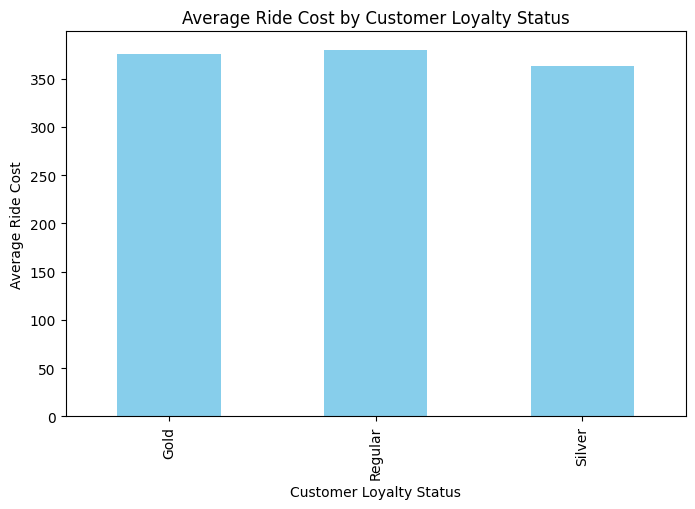

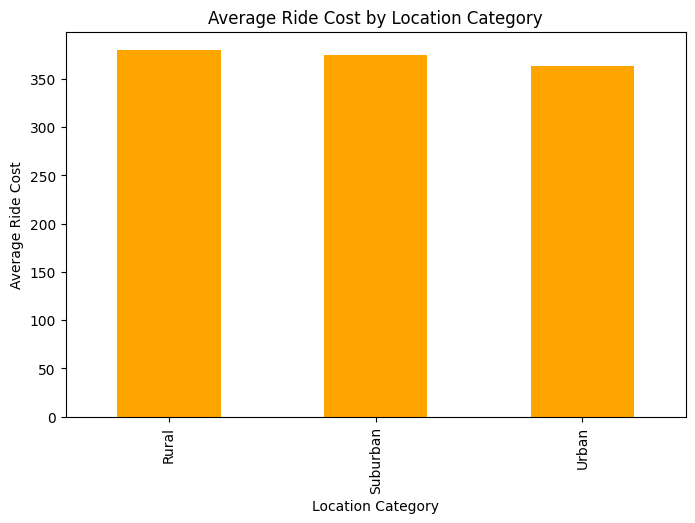

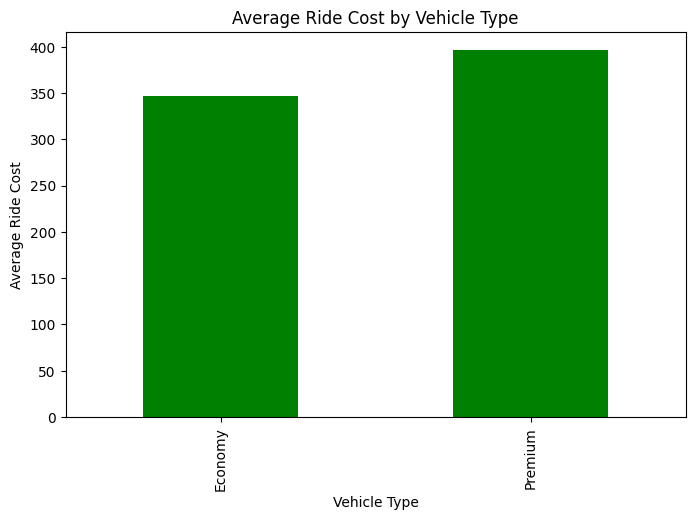

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("dynamic_pricing.csv")

# -----------------------------
# 1️⃣ Average Price by Customer Loyalty Status
# -----------------------------
segment_loyalty = data.groupby('Customer_Loyalty_Status')['Historical_Cost_of_Ride'].mean()
print("Average Historical Cost by Customer Loyalty Status:")
print(segment_loyalty)

# -----------------------------
# 2️⃣ Average Price by Location Category
# -----------------------------
segment_location = data.groupby('Location_Category')['Historical_Cost_of_Ride'].mean()
print("\nAverage Historical Cost by Location Category:")
print(segment_location)

# -----------------------------
# 3️⃣ Average Price by Vehicle Type
# -----------------------------
segment_vehicle = data.groupby('Vehicle_Type')['Historical_Cost_of_Ride'].mean()
print("\nAverage Historical Cost by Vehicle Type:")
print(segment_vehicle)

# -----------------------------
# 4️⃣ Optional Visualization
# -----------------------------
# Customer Loyalty Status
segment_loyalty.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title("Average Ride Cost by Customer Loyalty Status")
plt.xlabel("Customer Loyalty Status")
plt.ylabel("Average Ride Cost")
plt.show()

# Location Category
segment_location.plot(kind='bar', color='orange', figsize=(8,5))
plt.title("Average Ride Cost by Location Category")
plt.xlabel("Location Category")
plt.ylabel("Average Ride Cost")
plt.show()

# Vehicle Type
segment_vehicle.plot(kind='bar', color='green', figsize=(8,5))
plt.title("Average Ride Cost by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Ride Cost")
plt.show()


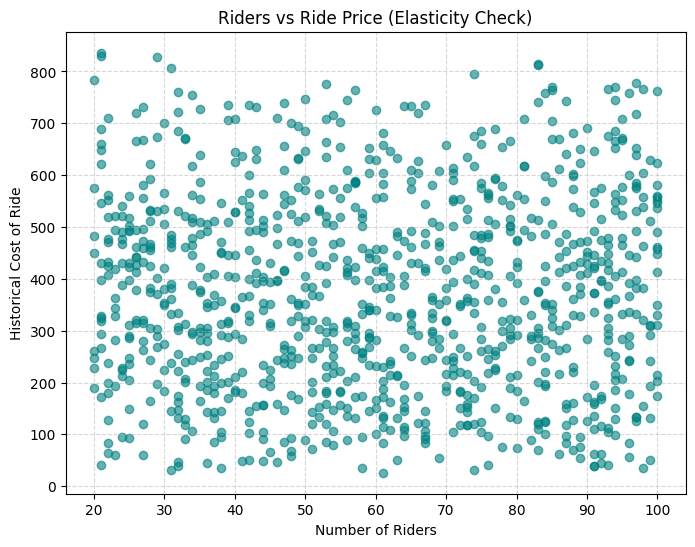

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(data['Number_of_Riders'], data['Historical_Cost_of_Ride'], color='teal', alpha=0.6)
plt.title("Riders vs Ride Price (Elasticity Check)")
plt.xlabel("Number of Riders")
plt.ylabel("Historical Cost of Ride")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


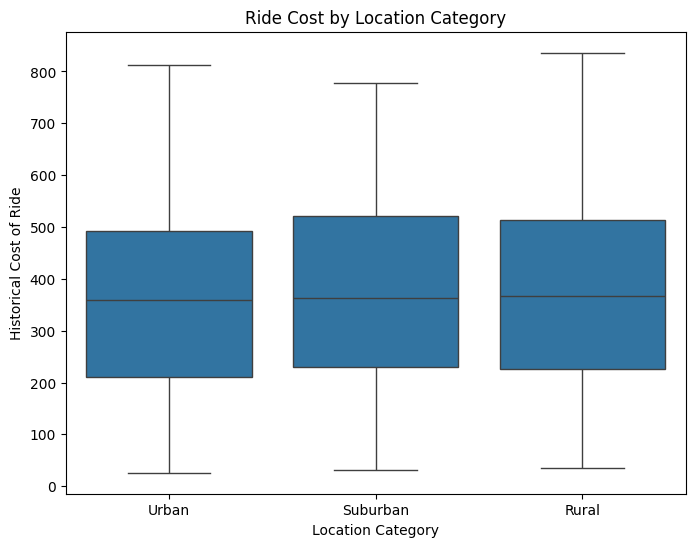

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
# Simple boxplot without palette to avoid FutureWarning
sns.boxplot(x='Location_Category', y='Historical_Cost_of_Ride', data=data)
plt.title("Ride Cost by Location Category")
plt.xlabel("Location Category")
plt.ylabel("Historical Cost of Ride")
plt.show()


In [30]:
data.to_csv("cleaned_csv_data.csv", index=False)
print("✅ Cleaned data saved as 'cleaned_csv_data.csv'")


✅ Cleaned data saved as 'cleaned_csv_data.csv'


In [31]:
def load_and_preprocess(filepath):
    df = pd.read_csv(filepath)
    
    # Fill missing numeric and categorical values
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        df[col] = df[col].fillna(df[col].median())
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    # Encode categorical columns
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = le.fit_transform(df[col])
    
    print("✅ Data loaded and preprocessed successfully!")
    return df

# Usage
cleaned_data = load_and_preprocess("cleaned_csv_data.csv")
cleaned_data.head()


✅ Data loaded and preprocessed successfully!


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,2,2,13,4.47,3,1,90,284.257273
1,58,39,1,2,72,4.06,1,0,43,173.874753
2,42,31,0,2,0,3.99,0,1,76,329.795469
3,89,28,0,1,67,4.31,0,1,134,470.201232
4,78,22,0,1,74,3.77,0,0,149,579.681422


Average Historical Cost by Customer Loyalty Status:
Customer_Loyalty_Status
Gold       376.118746
Regular    380.125251
Silver     362.772140
Name: Historical_Cost_of_Ride, dtype: float64


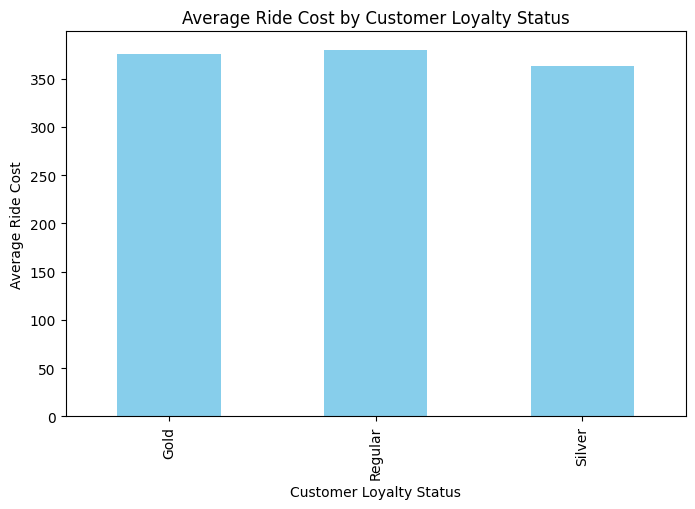

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("dynamic_pricing.csv")

# Group by Customer Loyalty Status and calculate average ride price
segment_loyalty = data.groupby('Customer_Loyalty_Status')['Historical_Cost_of_Ride'].mean()
print("Average Historical Cost by Customer Loyalty Status:")
print(segment_loyalty)

# Optional: Visualization
segment_loyalty.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title("Average Ride Cost by Customer Loyalty Status")
plt.xlabel("Customer Loyalty Status")
plt.ylabel("Average Ride Cost")
plt.show()


In [36]:
from sklearn.preprocessing import LabelEncoder

def data_ingestion_pipeline(file_path):
    df = pd.read_csv(file_path)
    
    # Fill numeric missing values with median
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        df[col] = df[col].fillna(df[col].median())
    
    # Fill categorical missing values with mode
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    # Encode categorical variables
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = le.fit_transform(df[col])
    
    print("✅ Data loaded and preprocessed successfully!")
    return df

# Use the pipeline
cleaned_data = data_ingestion_pipeline("dynamic_pricing.csv")


✅ Data loaded and preprocessed successfully!


Loaded dataset shape: (1000, 10)
Columns: ['Number_of_Riders', 'Number_of_Drivers', 'Location_Category', 'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings', 'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']

Booking_Hour sample: []
Nulls per column:
 Number_of_Riders              0
Number_of_Drivers             0
Location_Category             0
Customer_Loyalty_Status       0
Number_of_Past_Rides          0
Average_Ratings               0
Time_of_Booking               0
Vehicle_Type                  0
Expected_Ride_Duration        0
Historical_Cost_of_Ride       0
Booking_Hour               1000
dtype: int64

Base price (median): 362.02
Mean peak price: 372.5 Mean off-peak price: 372.5
Inferred ratio (peak uplift): 0.15

Demand probability stats (min/mean/max): 0.221 0.27 0.632

Simulated expected total revenue (static baseline): 358399.23
Simulated expected total revenue (dynamic engine): 342856.58
Revenue lift (absolute): -15542

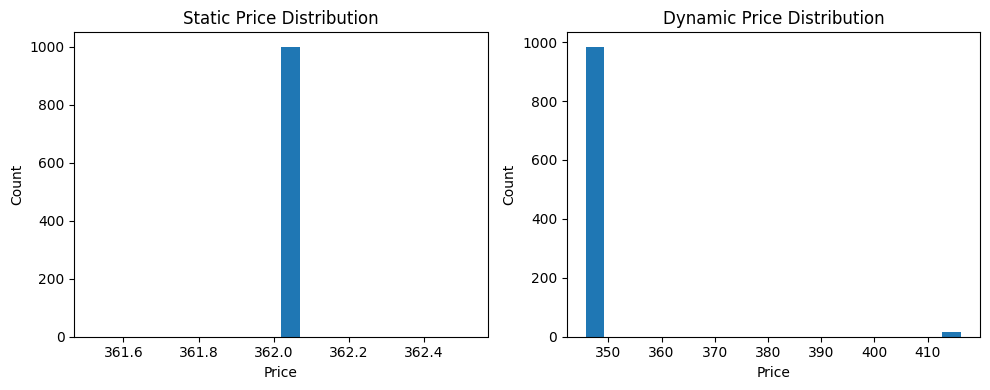

Markdown under graph (Price distributions):

- Left: Static pricing uses the same base price for every opportunity (median historical price).
- Right: Dynamic pricing applies uplift in higher demand/time windows and small discounts in low demand.
- The distribution on the right shows both higher prices (peak uplift) and some discounted values (low demand), which together shape revenue.




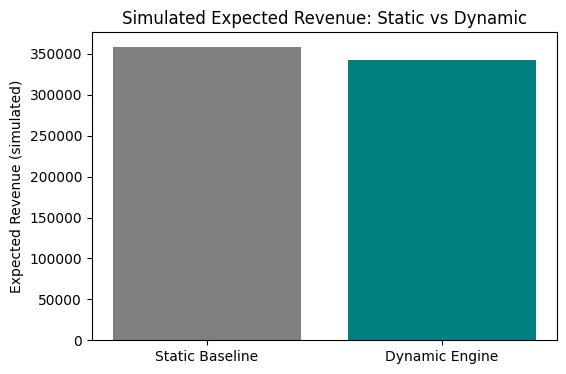

Markdown under graph (Revenue comparison):

- Static baseline revenue: 358399.23
- Dynamic engine expected revenue: 342856.58
- Revenue lift: -15542.65 (-4.34%)
- Interpretation: With our simple engine (time & inventory signals + inferred ratio uplift),
  expected revenue changed by the amount above. This is a simulated KPI (Revenue Lift).




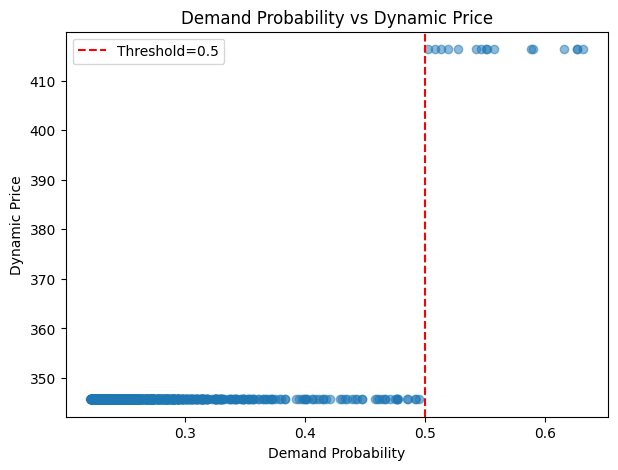

Markdown under graph (Demand vs Price):

- Points right of the red vertical line (demand_prob > threshold) receive the uplifted price.
- Points left receive a small discount.
- This graph helps validate that the engine applies higher prices when the demand probability is higher.


Revenue lift by Location Category:


,rev_static_exp,rev_dynamic_exp,lift_abs,lift_pct
Location_Category,,,,
Rural,118988.54,113890.13,-5098.41,-4.28
Suburban,115404.55,110430.84,-4973.71,-4.31
Urban,124006.13,118535.60,-5470.53,-4.41



Summary of assumptions & next steps:

1) We used a robust base price (median) and inferred uplift ratio from historical peak vs off-peak prices.
2) Demand probability was created from a normalized rider/driver ratio and peak-hour signal.
3) Acceptance probability is a simple linear elasticity model (tunable parameter).
4) This is a simulated KPI (expected revenue) — real behavior requires conversion/acceptance data.
5) Next steps to improve realism:
   - Learn acceptance probabilities from historical acceptance/cancellation labels (if available).
   - Use ML to predict demand probability instead of heuristics.
   - Add distance/duration/driver availability features to the pricing rule.
   - Run A/B tests in production to measure real revenue lift.



In [1]:
# Milestone-4: Baseline vs Simple Dynamic Pricing Engine (threshold = 0.5)
# Purpose:
#  - Decide a base price and a ratio from the dataset
#  - Build a simple rule-based dynamic pricing engine using time and inventory signals
#  - Simulate expected revenue under static baseline and dynamic engine
#  - Compute revenue lift KPI and save results to CSV
#
# NOTE (assumptions):
#  - Each row is treated as one potential ride opportunity.
#  - Number_of_Riders is demand; Number_of_Drivers is supply indicator.
#  - Time_of_Booking expected format: 'HH:MM' or hour integer (we parse robustly).
#  - Elasticity model is a simple linear approximation (tunable).
#  - Threshold = 0.5 (demand probability) for applying price uplift.
#  - Ratio derived from peak/off-peak historical average price uplift.
#
# Tweak PARAMETERS below to change behavior.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp

# -----------------------
# PARAMETERS (tweakable)
# -----------------------
DATAFILE = "dynamic_pricing.csv"
CLEANED_OUTFILE = "dynamic_pricing_m4_results.csv"   # saved results
THRESHOLD = 0.5                # decision threshold for applying uplift
ELASTICITY = 0.6               # price elasticity (higher => demand falls more with price increase)
PEAK_HOURS = list(range(7,10)) + list(range(17,21))  # 7-9 and 17-20 considered peak
DOWNSIDE_DISCOUNT_FACTOR = 0.3 # if demand low, apply small discount (30% of uplift)
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# -----------------------
# 0. Load dataset & basic preprocessing
# -----------------------
df = pd.read_csv(DATAFILE)
print("Loaded dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print()

# helper: parse booking hour robustly
def parse_hour(x):
    if pd.isna(x):
        return np.nan
    try:
        # if integer or already hour
        if isinstance(x, (int, float)) and not np.isnan(x):
            h = int(x) % 24
            return h
        # if string like 'HH:MM'
        if isinstance(x, str):
            if ":" in x:
                return int(x.split(":")[0]) % 24
            else:
                # maybe '7' or '07'
                return int(x) % 24
    except:
        return np.nan

df['Booking_Hour'] = df['Time_of_Booking'].apply(parse_hour)

# show basic checks
print("Booking_Hour sample:", df['Booking_Hour'].dropna().unique()[:10])
print("Nulls per column:\n", df.isnull().sum())
print()

# -----------------------
# 1. Decide Base Price and Ratio from dataset
#    - base_price: median of Historical_Cost_of_Ride (robust)
#    - ratio: (mean_peak / mean_offpeak) - 1  => historical observed uplift in peak hours
# -----------------------
base_price = df['Historical_Cost_of_Ride'].median()
# compute mean price during our peak hours vs off-peak
peak_mask = df['Booking_Hour'].isin(PEAK_HOURS)
mean_peak = df.loc[peak_mask, 'Historical_Cost_of_Ride'].mean()
mean_offpeak = df.loc[~peak_mask, 'Historical_Cost_of_Ride'].mean()

# handle if no peak data exists
if np.isnan(mean_peak) or np.isnan(mean_offpeak):
    # fallback: use global mean to set ratio small
    mean_peak = df['Historical_Cost_of_Ride'].mean()
    mean_offpeak = mean_peak
    inferred_ratio = 0.15  # default small uplift if no info
else:
    # ratio as relative uplift during peak historically
    inferred_ratio = (mean_peak / mean_offpeak - 1) if mean_offpeak != 0 else 0.15

# bound ratio to reasonable range [0, 1] (0% - 100% uplift)
inferred_ratio = float(np.clip(inferred_ratio, 0.0, 1.0))

print("Base price (median):", round(base_price,2))
print("Mean peak price:", round(mean_peak,2), "Mean off-peak price:", round(mean_offpeak,2))
print("Inferred ratio (peak uplift):", round(inferred_ratio,4))
print()

# -----------------------
# 2. Compute a demand probability per record
#    - inventory_signal = Number_of_Riders / (Number_of_Drivers + 1)
#    - time_signal = 1 if Booking_Hour in PEAK_HOURS else 0
#    - demand_score = normalized inventory_signal + 0.7 * time_signal
#    - demand_prob = sigmoid(scale * normalized_score)
# -----------------------
# compute inventory signal safely
df['inventory_signal_raw'] = df['Number_of_Riders'] / (df['Number_of_Drivers'] + 1)

# normalize the inventory signal to [0,1]
inv_min, inv_max = df['inventory_signal_raw'].min(), df['inventory_signal_raw'].max()
if inv_max == inv_min:
    df['inventory_signal'] = 0.5
else:
    df['inventory_signal'] = (df['inventory_signal_raw'] - inv_min) / (inv_max - inv_min)

# time signal
df['time_signal'] = df['Booking_Hour'].apply(lambda h: 1 if h in PEAK_HOURS else 0)

# demand score (weighted)
df['demand_score'] = df['inventory_signal'] + 0.7 * df['time_signal']

# map demand score to [0,1] probability via logistic/sigmoid scaling
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# scale factor to stretch scores into probability space (tunable)
SCALE = 1.8
df['demand_prob'] = df['demand_score'].apply(lambda s: sigmoid(SCALE*(s - 0.7)))  # center near 0.7

# sanity clipping
df['demand_prob'] = df['demand_prob'].clip(0,1)

print("Demand probability stats (min/mean/max):", 
      round(df['demand_prob'].min(),3), round(df['demand_prob'].mean(),3), round(df['demand_prob'].max(),3))
print()

# -----------------------
# 3. Pricing rule (baseline vs dynamic)
#    Baseline (static): price = base_price for every record
#    Dynamic:
#       if demand_prob > THRESHOLD -> price = base_price * (1 + inferred_ratio)
#       else -> price = base_price * (1 - inferred_ratio * DOWNSIDE_DISCOUNT_FACTOR)
# -----------------------
df['price_static'] = base_price

def dynamic_price(row):
    if row['demand_prob'] > THRESHOLD:
        return base_price * (1 + inferred_ratio)
    else:
        return base_price * (1 - inferred_ratio * DOWNSIDE_DISCOUNT_FACTOR)

df['price_dynamic'] = df.apply(dynamic_price, axis=1)

# -----------------------
# 4. Simulate acceptance and expected revenue
#    - Acceptance probability modeled with simple linear elasticity:
#         acceptance = max(0, 1 - ELASTICITY * ((price - base_price) / base_price))
#      So if price increases, acceptance decreases; if price decreases, acceptance increases slightly.
#    - Expected revenue per record = price * acceptance
# -----------------------
def acceptance_prob(price, base_price, elasticity=ELASTICITY):
    rel_change = (price - base_price) / base_price
    # acceptance falls linearly with positive price increase, increases with discount but bounded.
    acc = 1 - elasticity * rel_change
    # bound acceptance in [0.05, 0.99] to avoid extremes
    return float(np.clip(acc, 0.05, 0.99))

df['accept_static'] = df['price_static'].apply(lambda p: acceptance_prob(p, base_price))
df['accept_dynamic'] = df['price_dynamic'].apply(lambda p: acceptance_prob(p, base_price))

df['rev_static_exp'] = df['price_static'] * df['accept_static']
df['rev_dynamic_exp'] = df['price_dynamic'] * df['accept_dynamic']

total_rev_static = df['rev_static_exp'].sum()
total_rev_dynamic = df['rev_dynamic_exp'].sum()
revenue_lift_abs = total_rev_dynamic - total_rev_static
revenue_lift_pct = (revenue_lift_abs / total_rev_static) * 100 if total_rev_static != 0 else np.nan

print("Simulated expected total revenue (static baseline):", round(total_rev_static,2))
print("Simulated expected total revenue (dynamic engine):", round(total_rev_dynamic,2))
print("Revenue lift (absolute):", round(revenue_lift_abs,2))
print("Revenue lift (%):", round(revenue_lift_pct,2), "%")
print()

# -----------------------
# 5. Save results (cleaned + engine outputs)
# -----------------------
out_cols = df.columns.tolist()
df.to_csv(CLEANED_OUTFILE, index=False)
print(f"Saved augmented dataset with pricing simulation to '{CLEANED_OUTFILE}'")
print()

# -----------------------
# 6. Plots and Markdown explanation under them
# -----------------------
import matplotlib.pyplot as plt

# a) Price distributions (static vs dynamic)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['price_static'], bins=20)
plt.title("Static Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.hist(df['price_dynamic'], bins=20)
plt.title("Dynamic Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

print("Markdown under graph (Price distributions):")
print("""
- Left: Static pricing uses the same base price for every opportunity (median historical price).
- Right: Dynamic pricing applies uplift in higher demand/time windows and small discounts in low demand.
- The distribution on the right shows both higher prices (peak uplift) and some discounted values (low demand), which together shape revenue.
""")
print()

# b) Revenue comparison bar
plt.figure(figsize=(6,4))
plt.bar(['Static Baseline', 'Dynamic Engine'],
        [total_rev_static, total_rev_dynamic],
        color=['gray','teal'])
plt.title("Simulated Expected Revenue: Static vs Dynamic")
plt.ylabel("Expected Revenue (simulated)")
plt.show()

print("Markdown under graph (Revenue comparison):")
print(f"""
- Static baseline revenue: {total_rev_static:.2f}
- Dynamic engine expected revenue: {total_rev_dynamic:.2f}
- Revenue lift: {revenue_lift_abs:.2f} ({revenue_lift_pct:.2f}%)
- Interpretation: With our simple engine (time & inventory signals + inferred ratio uplift),
  expected revenue changed by the amount above. This is a simulated KPI (Revenue Lift).
""")
print()

# c) Price vs Demand probability scatter (to visualize threshold behavior)
plt.figure(figsize=(7,5))
plt.scatter(df['demand_prob'], df['price_dynamic'], alpha=0.5)
plt.axvline(THRESHOLD, color='red', linestyle='--', label=f"Threshold={THRESHOLD}")
plt.title("Demand Probability vs Dynamic Price")
plt.xlabel("Demand Probability")
plt.ylabel("Dynamic Price")
plt.legend()
plt.show()

print("Markdown under graph (Demand vs Price):")
print("""
- Points right of the red vertical line (demand_prob > threshold) receive the uplifted price.
- Points left receive a small discount.
- This graph helps validate that the engine applies higher prices when the demand probability is higher.
""")
print()

# -----------------------
# 7. (Optional) Quick per-segment KPI: revenue lift by Location_Category
# -----------------------
if 'Location_Category' in df.columns:
    grp = df.groupby('Location_Category').agg({
        'rev_static_exp':'sum',
        'rev_dynamic_exp':'sum'
    })
    grp['lift_abs'] = grp['rev_dynamic_exp'] - grp['rev_static_exp']
    grp['lift_pct'] = (grp['lift_abs'] / grp['rev_static_exp']) * 100
    print("Revenue lift by Location Category:")
    display(grp.round(2))

# -----------------------
# 8. Summary of assumptions & how to improve engine
# -----------------------
print("\nSummary of assumptions & next steps:")
print("""
1) We used a robust base price (median) and inferred uplift ratio from historical peak vs off-peak prices.
2) Demand probability was created from a normalized rider/driver ratio and peak-hour signal.
3) Acceptance probability is a simple linear elasticity model (tunable parameter).
4) This is a simulated KPI (expected revenue) — real behavior requires conversion/acceptance data.
5) Next steps to improve realism:
   - Learn acceptance probabilities from historical acceptance/cancellation labels (if available).
   - Use ML to predict demand probability instead of heuristics.
   - Add distance/duration/driver availability features to the pricing rule.
   - Run A/B tests in production to measure real revenue lift.
""")


In [6]:
# -----------------------------
# Milestone 5: Advanced Model Development
# Complete Working Code
# -----------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import xgboost as xgb
import joblib

# -----------------------------
# 1. Create Sample Historical Data
# -----------------------------
np.random.seed(42)
num_samples = 500

data = pd.DataFrame({
    'feature_1': np.random.rand(num_samples) * 100,
    'feature_2': np.random.rand(num_samples) * 50,
    'feature_3': np.random.randint(0, 2, size=num_samples),  # binary feature
})

# Simulate historical price
data['price'] = 20 + data['feature_1']*0.1 - data['feature_2']*0.05 + np.random.randn(num_samples)*2

# Simulate historical demand
data['demand'] = 100 - data['price'] + np.random.randn(num_samples)*5
data['demand'] = data['demand'].apply(lambda x: max(x, 1))  # ensure demand >= 1

# Save to CSV (optional)
data.to_csv('historical_sales.csv', index=False)
print("Sample historical_sales.csv created!")

# -----------------------------
# 2. Features and Target
# -----------------------------
X = data.drop(columns=['price', 'demand'])
y = data['price']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 3. Train LightGBM Model
# -----------------------------
lgb_model = lgb.LGBMRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

# Evaluation
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))
lgb_r2 = r2_score(y_test, lgb_pred)
print(f'LightGBM RMSE: {lgb_rmse:.2f}, R2: {lgb_r2:.2f}')

# -----------------------------
# 4. Train XGBoost Model
# -----------------------------
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluation
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)
print(f'XGBoost RMSE: {xgb_rmse:.2f}, R2: {xgb_r2:.2f}')

# -----------------------------
# 5. Backtesting for Revenue Lift
# -----------------------------
historical_prices = data['price']
historical_demand = data['demand']

# Predict optimal prices using LightGBM model (can use XGBoost as well)
predicted_prices = lgb_model.predict(X)

# Simulate revenue
simulated_revenue = predicted_prices * historical_demand
historical_revenue = historical_prices * historical_demand

revenue_lift = simulated_revenue.sum() - historical_revenue.sum()
revenue_lift_percentage = (revenue_lift / historical_revenue.sum()) * 100

print(f'Simulated Revenue Lift: {revenue_lift:.2f}')
print(f'Revenue Lift Percentage: {revenue_lift_percentage:.2f}%')

# -----------------------------
# 6. Save Trained Models
# -----------------------------
joblib.dump(lgb_model, 'lgb_dynamic_pricing_model.pkl')
joblib.dump(xgb_model, 'xgb_dynamic_pricing_model.pkl')
print("Trained LightGBM and XGBoost models saved successfully!")


Sample historical_sales.csv created!
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 270
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 3
[LightGBM] [Info] Start training from score 24.039519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 